<a href="https://colab.research.google.com/github/ldk7024/Deep_Learning_Study/blob/main/21_07_13_keras_%EB%A7%9B%EB%B3%B4%EA%B8%B0_(iris_%ED%92%88%EC%A2%85_%EB%B6%84%EB%A5%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 목표
- iris 데이터를 바탕으로 어떤 품종인지 예측해보자!
- 신경망을 활용하여 다중분류 문제를 해결해보자!

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [153]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [154]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [155]:
X= iris.data
y= iris.target

In [156]:
X.shape, y.shape

((150, 4), (150,))

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
X_train, X_test,y_train, y_test = train_test_split(X,y, random_state=3)

In [172]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


- 정답데이터 원핫인코딩

In [173]:
from tensorflow.keras.utils import to_categorical

In [174]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [175]:
# y_train_one_hot = pd.get_dummies(y_train)
# y_test_one_hot = pd.get_dummies(y_test)

In [176]:
y_train_one_hot 

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0

- 1. 신경망 구조 설계
- 2. 학습/평가 방법 설정
- 3. 학습 및 시각화
- 4. 모델 평가

In [177]:
# 딥러닝을 위한 라이브러리를 임포트
from tensorflow.keras import Sequential  # 신경망의 뼈대를 구성
from tensorflow.keras.layers import Dense   # 신경망의 층을 구성
from tensorflow.keras.layers import InputLayer,Dense

In [178]:
# 신경망의 뼈대를 설정
model = Sequential()

# 입력층 + 중간층
# input_dim : 데이터 특성의 개수
# activation: 활성화 함수를 설정 (들어온 자극 (데이터)에 대한 응답여부를 결정하는 함수)
model.add(Dense(20,input_dim=4,activation="sigmoid"))

# 중간층
model.add(Dense(40,activation="sigmoid"))   # 하나의 층
model.add(Dense(10, activation="sigmoid"))   # 하나의 층

# 출력층
# 출력층은 회귀의 활성화 함수(linear 함수, 활성화 함수 생략가능)
# 2진 분류 (sigmoid 함수)
model.add(Dense(3, activation="softmax")) 

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 20)                100       
_________________________________________________________________
dense_57 (Dense)             (None, 40)                840       
_________________________________________________________________
dense_58 (Dense)             (None, 10)                410       
_________________________________________________________________
dense_59 (Dense)             (None, 3)                 33        
Total params: 1,383
Trainable params: 1,383
Non-trainable params: 0
_________________________________________________________________


In [179]:
# 2. 학습/ 평가 방법 설정
# binary_crosstentropy : 2진 분류에 사용하는 손실함수 (비용함수)
# -> 오차의 평균을 구하는 것은 MSE와 같지만 0~1사이 값으로 변환 후 평균오차를 구하게 되는 방식
model.compile(loss ="categorical_crossentropy",
               optimizer = 'Adam',            # Adam : 최근에 가장 많이 사용되는 성능이 높은 최적화 함수
               metrics = ["acc"]               # metrics: 평가 방법을 설정 (분류 문제이기 때문에 정확도(acc)를 확인)
               )

In [180]:
h = model.fit(X_train, y_train_one_hot, epochs=200)

Epoch 1/200
4/4 [==============================] - 1s 3ms/step - loss: 1.1713 - acc: 0.3482
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 1.1505 - acc: 0.3482
Epoch 3/200
4/4 [==============================] - 0s 3ms/step - loss: 1.1342 - acc: 0.3482
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 1.1205 - acc: 0.3482
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 1.1108 - acc: 0.3482
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 1.1024 - acc: 0.3482
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 1.0969 - acc: 0.3482
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 1.0919 - acc: 0.3482
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 1.0919 - acc: 0.3482
Epoch 10/200
4/4 [==============================] - 0s 3ms/step - loss: 1.0894 - acc: 0.3482
Epoch 11/200
4/4 [==============================] - 0s 4ms/step - loss: 1.0880 

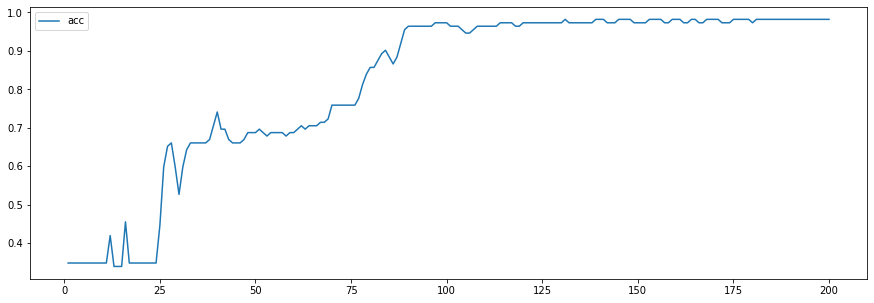

In [181]:
# 시각화
plt.figure(figsize=(15,5))

plt.plot(range(1,201),
         h.history['acc'],
         label ='acc'
         )

plt.legend()
plt.show()

In [183]:
# 모델 평가
model.evaluate(X_test,y_test_one_hot)

2/2 [==============================] - 0s 11ms/step - loss: 0.1576 - acc: 0.9737


[0.15761327743530273, 0.9736841917037964]

### 1. 회귀
- loss: mse (평균제곱오차)
- 출력층 뉴런 개수: 1
- 출력층 활성화 함수: linear(항듬함수) -> 디폴트 값

### 2. 2진 분류
- loss: binary_crossentropy
- 출력층 뉴런 개수: 1
- 출력층 활성화 함수: sigmoid

### 3. 다중 분류
- loss: categorical_crossentropy
- 출력층 뉴런 개수: 정답 레이블의 개수
- 출력층 활성화 함수: softmax
